## Analysis of 2018 Pyber Data

- Urban cities tended to have more drivers per city than did suburban and rural cities, and there were generally more rides given in urban cities than in suburban and rural cities, regardless of the number of drivers in each city. (Rural cities rarely had more than about ten rides per city, whereas urban cities typically had fifteen or more rides per city during 2018.)
- Average fares in 2018 were markedly lower in urban cities than they were in rural cities. (Generally speaking, the fare for a ride in an urban city was no more than 30 dollars; conversely, rides in rural cities typically had fares of over thirty dollars.)
- In short, there were fewer rides given in rural cities than in urban cities, but those rides had higher fares than did rides in urban cities. 

In [146]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Load files
city_data_file = "city_data.csv"
ride_data_file = "ride_data.csv"

# Read files
city_data=pd.read_csv(city_data_file)
ride_data=pd.read_csv(ride_data_file)

# Combine the data into a single dataset
all_data_df=pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
all_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [147]:
#Separate data by city type to use in calcs
urban_data= all_data_df[all_data_df["type"]=="Urban"]
suburban_data= all_data_df[all_data_df["type"]=="Suburban"]
rural_data= all_data_df[all_data_df["type"]=="Rural"]

#Count the number of drivers in each city
urban_driver_count=urban_data.groupby("city").mean()["driver_count"]
suburban_driver_count=suburban_data.groupby("city").mean()["driver_count"]
rural_driver_count=rural_data.groupby("city").mean()["driver_count"]

#Find the average fare for each city
urban_city_fare=urban_data.groupby("city").mean()["fare"]
suburban_city_fare=suburban_data.groupby("city").mean()["fare"]
rural_city_fare=rural_data.groupby("city").mean()["fare"]

#Count the number of rides per city
urban_city_rides=urban_data.groupby("city").count()["ride_id"]
suburban_city_rides=suburban_data.groupby("city").count()["ride_id"]
rural_city_rides=rural_data.groupby("city").count()["ride_id"]


## Bubble Plot of Ride Sharing Data

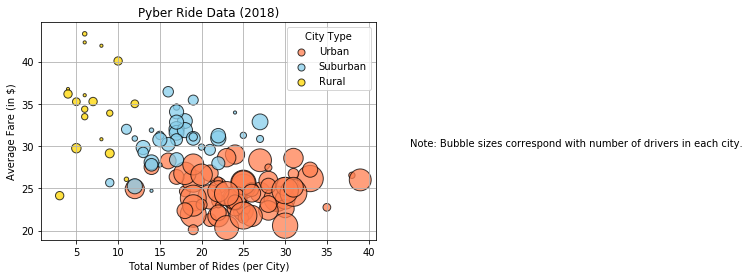

In [148]:
#Set x and y axes for each city type. 
x_axis_urban=urban_city_rides
y_axis_urban=urban_city_fare

x_axis_suburban=suburban_city_rides
y_axis_suburban=suburban_city_fare

x_axis_rural=rural_city_rides
y_axis_rural=rural_city_fare


# Build the scatter plots for each city type
    #Add labels for your legend here. This 
UC_scatter=plt.scatter(x_axis_urban, y_axis_urban, marker="o", facecolors='coral', edgecolors='black', 
            s=urban_driver_count*10, alpha=0.75, label="Urban")
SC_scatter=plt.scatter(x_axis_suburban, y_axis_suburban, marker="o", facecolors='skyblue', edgecolors='black', 
            s=suburban_driver_count*10, alpha=0.75, label="Suburban")
RC_scatter=plt.scatter(x_axis_rural, y_axis_rural, marker="o", facecolors='gold', edgecolors='black', 
            s=rural_driver_count*10, alpha=0.75, label="Rural")

# Incorporate the other graph properties
    #Add gridlines
plt.grid(True)

    #Add title and axis labels
plt.title("Pyber Ride Data (2018)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare (in $)")

    # Create a legend with a title; adjust handles so that they are of uniform size. 
    #If you did not add labels when creating your scatter plots, you can update them here as well. 
legend=plt.legend(title="City Type")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

    # Incorporate a text label to explain significance of circle size
text_label= "Note: Bubble sizes correspond with number of drivers in each city."
plt.text(45, 30, text_label, fontsize=10)

# Save Figure
# Use bbox to make sure that text label is saved in output. 
plt.savefig("PyberRideData(2018).png", bbox_inches="tight")
plt.show()

## Total Fares by City Type

In [149]:
#Calculate the total fares for each city and the percentage of total fares that each constitutes
#Get back to original DF and make a copy
all_totalFares=all_data_df.copy()

#Find total fare for each city type
urban_fares=urban_data.sum()["fare"]
suburban_fares=suburban_data.sum()["fare"]
rural_fares=rural_data.sum()["fare"]

#Find total of all fares
total_fares=all_totalFares["fare"].count()

#Divide each city type fare total by cumulative total; multiply by 100 to get percentage
urban_fare_pct=(urban_fares/total_fares)*100
suburban_fare_pct=(suburban_fares/total_fares)*100
rural_fare_pct=(rural_fares/total_fares)*100


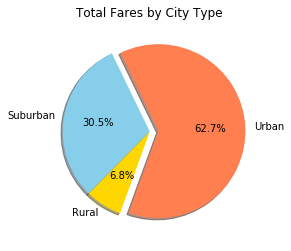

In [150]:
# Build Pie Chart

labels=["Urban", "Suburban", "Rural"]

values= [urban_fares, suburban_fares, rural_fares]

colors= ["coral", "skyblue", "gold"]

explode=[0.1, 0, 0]

plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=250)
plt.title("Total Fares by City Type")
# Save Figure
plt.savefig("TotalFaresbyCityType.png")
plt.show()

## Total Rides by City Type

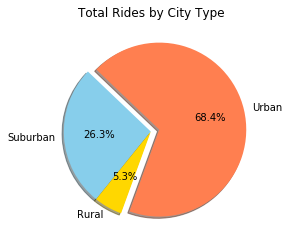

In [151]:
# Calculate Ride Percents

#Count of ride ID for each
urban_rides=urban_data.count()["ride_id"]
suburban_rides=suburban_data.count()["ride_id"]
rural_rides=rural_data.count()["ride_id"]

#Total rides
total_rides=all_data_df["ride_id"].count()

#Divide ride count city type by total ride count*100
urban_ride_pct=(urban_rides/total_rides)*100
suburban_ride_pct=(suburban_rides/total_rides)*100
rural_ride_pct=(rural_rides/total_rides)*100

# Build Pie Chart
labels=["Urban", "Suburban", "Rural"]

values= [urban_rides, suburban_rides, rural_rides]

colors= ["coral", "skyblue", "gold"]

explode=[0.1, 0, 0]

plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=250)

plt.title("Total Rides by City Type")

# Save Figure
plt.savefig("TotalRidesbyCityType.png")
plt.show()

## Total Drivers by City Type

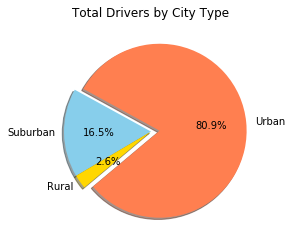

In [152]:
# Calculate Driver Percents
#Total number of drivers each city type
####Heads up! Group by city and find mean.  
urban_drivers=sum(urban_data.groupby("city").mean()["driver_count"])
suburban_drivers=sum(suburban_data.groupby("city").mean()["driver_count"])
rural_drivers=sum(rural_data.groupby("city").mean()["driver_count"])

#Total of all
all_drivers=(urban_drivers+suburban_drivers+rural_drivers)

#Divide as before*100
pct_urban_drivers=urban_drivers/all_drivers*100
pct_suburban_drivers=suburban_drivers/all_drivers*100
pct_rural_drivers=rural_drivers/all_drivers*100

# Build Pie Charts
labels=["Urban", "Suburban", "Rural"]
values= [urban_drivers, suburban_drivers, rural_drivers]
colors= ["coral", "skyblue", "gold"]
explode=[0.1, 0, 0]

plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=220)
plt.title("Total Drivers by City Type")

# Save Figure
plt.savefig("TotalDriversbyCityType.png")

#Display Figure
plt.show()

## Trends

The trendlines reveal an additional layer of the data that would be easy to miss otherwise: at first glance, it appears that fares are positively correlated with the number of rides in all city types. The effect appears to be subtlest with urban cities and most pronounced with rural cities. However, trend lines reveal that this is not the case. While a greater number of rides is indeed associated with greater fares in suburban cities (and to a lesser extent in urban cities), in rural cities, there is a slightly negative correlation. Despite this trend, rural rides generally have higher fares than do both suburban and urban rides. 

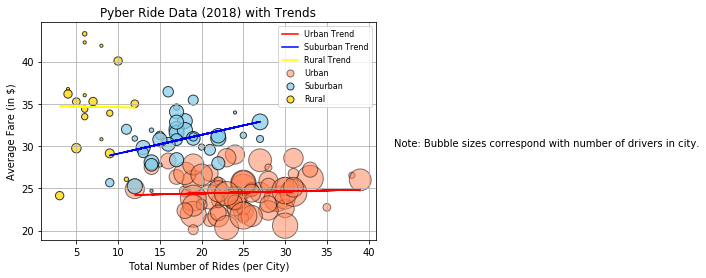

In [153]:
# Build the scatter plots for each city type
UC_scatter=plt.scatter(x_axis_urban, y_axis_urban, marker="o", facecolors='coral', edgecolors='black', 
            s=urban_driver_count*10, alpha=0.5, label="Urban")
SC_scatter=plt.scatter(x_axis_suburban, y_axis_suburban, marker="o", facecolors='skyblue', edgecolors='black', 
            s=suburban_driver_count*10, alpha=0.75, label="Suburban")
RC_scatter=plt.scatter(x_axis_rural, y_axis_rural, marker="o", facecolors='gold', edgecolors='black', 
            s=rural_driver_count*10, alpha=0.75, label="Rural")

#Create trend lines
Uz=np.polyfit(x_axis_urban, y_axis_urban, 1)
Up=np.poly1d(Uz)
plt.plot(x_axis_urban, Up(x_axis_urban), "red", alpha=1, label="Urban Trend")

Sz=np.polyfit(x_axis_suburban, y_axis_suburban, 1)
Sp=np.poly1d(Sz)
plt.plot(x_axis_suburban, Sp(x_axis_suburban), "blue", alpha=1, label="Suburban Trend")

Rz=np.polyfit(x_axis_rural, y_axis_rural, 1)
Rp=np.poly1d(Rz)
plt.plot(x_axis_rural, Rp(x_axis_rural), "yellow", alpha=1, label="Rural Trend")

# Incorporate the other graph properties
    #Add gridlines
plt.grid(True)

#Legend
legend=plt.legend(title="Legend")
legend=plt.legend(title="City Type")
legend=plt.legend(loc="best", prop={'size':8})
legend.legendHandles[3]._sizes = [50]
legend.legendHandles[4]._sizes = [50]
legend.legendHandles[5]._sizes = [50]

    #Add title and axis labels
plt.title("Pyber Ride Data (2018) with Trends")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare (in $)")

    # Incorporate a text label to explain significance of circle size
text_label= "Note: Bubble sizes correspond with number of drivers in city."
plt.text(43, 30, text_label, fontsize=10)

# Save Figure
# Use bbox to make sure that text label is saved in output. 
plt.savefig("PyberRideData(2018) with Trends.png", bbox_inches="tight")
plt.show()

## A Closer Look

Below is a zoomed-in look at the rural trendline itself that more clearly shows its negative slope, along with the trend line's equation, which confirms the negative slope. 

Linear equation is y=-0.016744x+34.754040
Slope is approximately -1.7%.


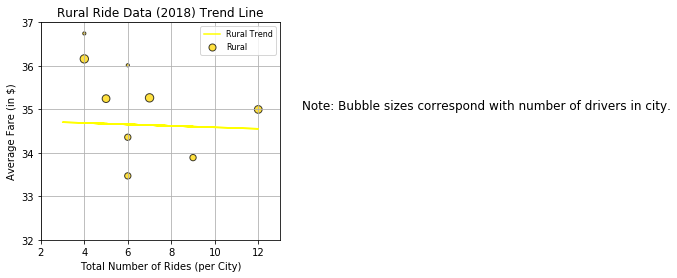

In [154]:
#Scatter plot for rural
RC_scatter=plt.scatter(x_axis_rural, y_axis_rural, marker="o", facecolors='gold', edgecolors='black', 
            s=rural_driver_count*10, alpha=0.75, label="Rural")

#Trend line
Rz=np.polyfit(x_axis_rural, y_axis_rural, 1)
Rp=np.poly1d(Rz)
plt.plot(x_axis_rural, Rp(x_axis_rural), "yellow", alpha=1, label="Rural Trend")

#Display only portion of chart with trend line
plt.plot(range(5))
plt.xlim(2, 13)
plt.ylim(32, 37)
plt.gca().set_aspect('2', adjustable='box')

#Add graph elements
plt.title("Rural Ride Data (2018) Trend Line")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare (in $)")
plt.grid(True)
legend=plt.legend(title="Legend")
legend=plt.legend(title="City Type")
legend=plt.legend(loc="best", prop={'size':8})
legend.legendHandles[1]._sizes = [50]
text_label= "Note: Bubble sizes correspond with number of drivers in city."
plt.text(14, 35, text_label, fontsize=12)

#Print equation for the slope. 
print("Linear equation is y=%.6fx+%.6f"% (Rz[0],Rz[1]))
print("Slope is approximately -1.7%.")

#Save figure
plt.savefig("Pyber Rural Rides (2018) with Trend.png", bbox_inches="tight")
plt.show()